In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("tournament_depth4.csv")
df.head()

,test_id,B heuristic,W heuristic,winner,rounds,nodes_white,nodes_black,total_nodes,time_white,time_black,total_time
0,0,MobilityHeuristic,MobilityHeuristic,W,27,159319,212292,371611,7.261333,9.954370,17.215704
1,1,MobilityHeuristic,MobilePieceCountHeuristic,B,26,281958,216842,498800,13.734772,10.165606,23.900378
2,2,MobilityHeuristic,EdgeHeuristic,W,19,180366,140999,321365,3.928059,6.934434,10.862493
3,3,MobilityHeuristic,ImprovedPositionHeuristic,W,21,261733,209790,471523,12.917854,9.911654,22.829508
4,4,MobilityHeuristic,IsolationHeuristic,B,20,269279,164688,433967,15.876969,7.942440,23.819408


In [53]:
from collections import Counter
import math

win_counts = Counter()
total_games_for_1_heuristic = math.sqrt(df.shape[0]) * 2 - 1

for _, row in df.iterrows():
    winner = row['winner']
    heuristic = row['W heuristic'] if winner == 'W' else row['B heuristic']
    win_counts[heuristic] += 1

win_rates = {heur: round(count / total_games_for_1_heuristic * 100, 2) for heur, count in win_counts.items()}

win_df = pd.DataFrame({
    'heuristic': list(win_counts.keys()),
    'wins': list(win_counts.values()),
    'win_rate (%)': list(win_rates.values())
})

win_df.sort_values(by='win_rate (%)', ascending=False)

,heuristic,wins,win_rate (%)
2,ImprovedPositionHeuristic,19,70.37
12,ClusteringHeuristic,19,70.37
8,StyleMatchupHeuristic,18,66.67
11,ControlZoneHeuristic,17,62.96
4,CentralControlHeuristic,16,59.26
6,OptimizedCombinedHeuristic,16,59.26
1,EdgeHeuristic,14,51.85
10,IsolationHeuristic,13,48.15
3,EndgameHeuristic,12,44.44
9,MobilePieceCountHeuristic,12,44.44


In [54]:
white_stats = df.groupby('W heuristic').agg({
    'nodes_white': 'mean',
    'time_white': 'mean'
}).rename(columns={
    'nodes_white': 'avg_nodes_as_white',
    'time_white': 'avg_time_as_white'
})

black_stats = df.groupby('B heuristic').agg({
    'nodes_black': 'mean',
    'time_black': 'mean'
}).rename(columns={
    'nodes_black': 'avg_nodes_as_black',
    'time_black': 'avg_time_as_black'
})

efficiency = pd.merge(black_stats, white_stats, left_index=True, right_index=True, how='outer').fillna(0)
efficiency


,avg_nodes_as_black,avg_time_as_black,avg_nodes_as_white,avg_time_as_white
B heuristic,,,,
CentralControlHeuristic,255409.857143,4.515528,171639.571429,3.030770
ClusteringHeuristic,321433.214286,13.684887,239629.571429,10.064754
ControlZoneHeuristic,263640.285714,32.656420,246578.142857,82.278681
EdgeHeuristic,326313.357143,6.638844,168107.500000,3.649799
EndgameHeuristic,199316.571429,13.308626,171443.142857,12.738411
ImprovedPositionHeuristic,697652.142857,36.106003,245480.857143,12.400088
IsolationHeuristic,310761.000000,19.067591,237596.071429,14.212964
MobilePieceCountHeuristic,344291.214286,26.327165,238394.357143,12.056194
MobilityHeuristic,183216.928571,8.750872,139957.857143,6.563065


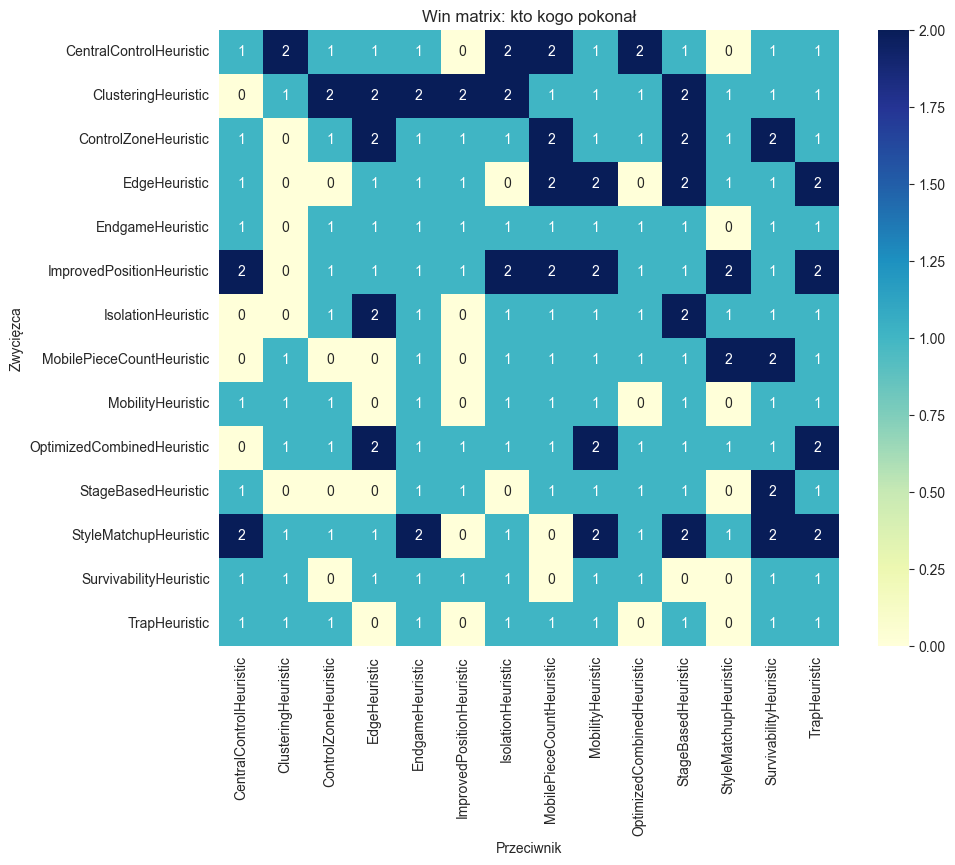

In [55]:
heuristics = sorted(set(df['B heuristic']).union(set(df['W heuristic'])))
win_matrix = pd.DataFrame(0, index=heuristics, columns=heuristics)

for _, row in df.iterrows():
    white = row['W heuristic']
    black = row['B heuristic']
    if row['winner'] == 'W':
        win_matrix.loc[white, black] += 1
    else:
        win_matrix.loc[black, white] += 1

plt.figure(figsize=(10, 8))
sns.heatmap(win_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Win matrix: kto kogo pokonał')
plt.xlabel('Przeciwnik')
plt.ylabel('Zwycięzca')
plt.show()


In [56]:
print("Zwycięstwa gracza B:", (df['winner'] == 'B').sum())
print("Zwycięstwa gracza W:", (df['winner'] == 'W').sum())


Zwycięstwa gracza B: 93
Zwycięstwa gracza W: 103


In [57]:
df[['test_id', 'B heuristic', 'W heuristic', 'total_time', 'winner']].sort_values(by='total_time').head(10)


,test_id,B heuristic,W heuristic,total_time,winner
128,128,CentralControlHeuristic,EdgeHeuristic,7.157337,B
37,37,EdgeHeuristic,CentralControlHeuristic,8.362632,B
135,135,CentralControlHeuristic,CentralControlHeuristic,8.386519,B
142,142,TrapHeuristic,EdgeHeuristic,9.793704,W
2,2,MobilityHeuristic,EdgeHeuristic,10.862493,W
134,134,CentralControlHeuristic,SurvivabilityHeuristic,11.087222,W
30,30,EdgeHeuristic,EdgeHeuristic,11.152060,W
136,136,CentralControlHeuristic,TrapHeuristic,11.344234,W
149,149,TrapHeuristic,CentralControlHeuristic,12.055815,W
38,38,EdgeHeuristic,TrapHeuristic,12.127789,B


In [58]:
df[['test_id', 'B heuristic', 'W heuristic', 'total_nodes', 'winner']].sort_values(by='total_nodes', ascending=False).head(10)


,test_id,B heuristic,W heuristic,total_nodes,winner
45,45,ImprovedPositionHeuristic,ImprovedPositionHeuristic,1034032,W
43,43,ImprovedPositionHeuristic,MobilePieceCountHeuristic,1016877,B
48,48,ImprovedPositionHeuristic,ControlZoneHeuristic,1007855,W
54,54,ImprovedPositionHeuristic,StageBasedHeuristic,994909,B
180,180,StageBasedHeuristic,StageBasedHeuristic,992570,W
174,174,StageBasedHeuristic,ControlZoneHeuristic,985257,W
169,169,StageBasedHeuristic,MobilePieceCountHeuristic,982228,W
171,171,StageBasedHeuristic,ImprovedPositionHeuristic,980117,B
51,51,ImprovedPositionHeuristic,CentralControlHeuristic,968804,B
46,46,ImprovedPositionHeuristic,IsolationHeuristic,958584,B


In [59]:
std_white = df.groupby('W heuristic')[['nodes_white', 'time_white']].std()
std_black = df.groupby('B heuristic')[['nodes_black', 'time_black']].std()

std_all = pd.concat([std_white, std_black], axis=1).fillna(0)
std_all.columns = ['std_nodes_white', 'std_time_white', 'std_nodes_black', 'std_time_black']
std_all


,std_nodes_white,std_time_white,std_nodes_black,std_time_black
CentralControlHeuristic,34766.889969,0.589132,30091.380197,0.527724
ClusteringHeuristic,23154.506362,0.903268,47485.464643,1.933806
ControlZoneHeuristic,45917.834923,194.289513,31414.581992,3.503890
EdgeHeuristic,16561.082916,0.330942,31629.886625,0.635043
EndgameHeuristic,33979.430191,3.022924,32980.527093,2.615746
ImprovedPositionHeuristic,51752.701096,2.554268,59241.793659,2.832417
IsolationHeuristic,32412.483740,1.903140,41353.586281,2.358103
MobilePieceCountHeuristic,43536.869672,2.111315,43312.742322,27.447565
MobilityHeuristic,23787.736455,1.062530,28875.773001,1.251725
OptimizedCombinedHeuristic,68291.611161,253.734701,62952.312381,11.067862


In [60]:
# Liczenie zwycięstw osobno dla B i W
win_as_black = df[df['winner'] == 'B']['B heuristic'].value_counts()
win_as_white = df[df['winner'] == 'W']['W heuristic'].value_counts()

# Tworzymy wspólny DataFrame
heuristics = sorted(set(df['B heuristic']).union(set(df['W heuristic'])))
win_roles = pd.DataFrame(index=heuristics)
win_roles['wins_as_black'] = win_as_black
win_roles['wins_as_white'] = win_as_white
win_roles = win_roles.fillna(0).astype(int)

# Dodajemy kolumnę ze łączną liczbą zwycięstw
win_roles['total_wins'] = win_roles['wins_as_black'] + win_roles['wins_as_white']

# Sortujemy po liczbie zwycięstw
win_roles = win_roles.sort_values(by='total_wins', ascending=False)

# Wyświetlamy
win_roles


,wins_as_black,wins_as_white,total_wins
ClusteringHeuristic,11,8,19
ImprovedPositionHeuristic,9,10,19
StyleMatchupHeuristic,8,10,18
ControlZoneHeuristic,7,10,17
CentralControlHeuristic,8,8,16
OptimizedCombinedHeuristic,9,7,16
EdgeHeuristic,7,7,14
IsolationHeuristic,8,5,13
EndgameHeuristic,4,8,12
MobilePieceCountHeuristic,4,8,12


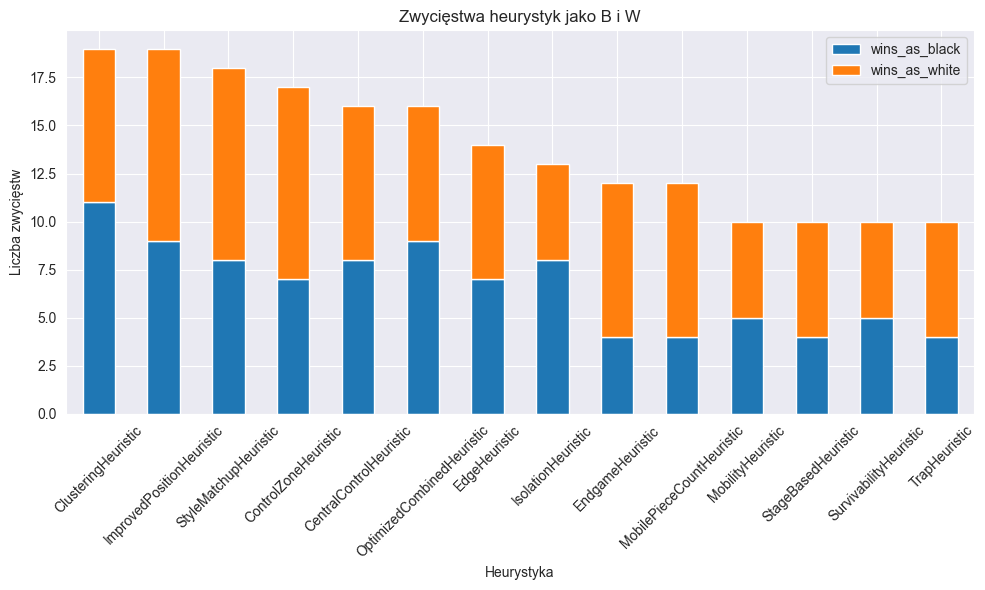

In [61]:
win_roles[['wins_as_black', 'wins_as_white']].plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    title='Zwycięstwa heurystyk jako B i W'
)
plt.xlabel("Heurystyka")
plt.ylabel("Liczba zwycięstw")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [62]:
same_heur_df = df[df['B heuristic'] == df['W heuristic']].copy()
print(f"Liczba meczów z tą samą heurystyką po obu stronach: {same_heur_df.shape[0]}")
same_heur_df[['test_id', 'B heuristic', 'winner', 'rounds', 'total_time', 'total_nodes']]


Liczba meczów z tą samą heurystyką po obu stronach: 14


,test_id,B heuristic,winner,rounds,total_time,total_nodes
0,0,MobilityHeuristic,W,27,17.215704,371611
15,15,MobilePieceCountHeuristic,B,22,32.933787,642643
30,30,EdgeHeuristic,W,21,11.152060,546029
45,45,ImprovedPositionHeuristic,W,19,52.390023,1034032
60,60,IsolationHeuristic,W,21,33.011573,539231
75,75,EndgameHeuristic,B,22,29.378984,411374
90,90,ControlZoneHeuristic,W,21,68.005467,556482
105,105,ClusteringHeuristic,B,22,22.259256,529917
120,120,SurvivabilityHeuristic,B,12,15.588875,411853
135,135,CentralControlHeuristic,B,24,8.386519,479975


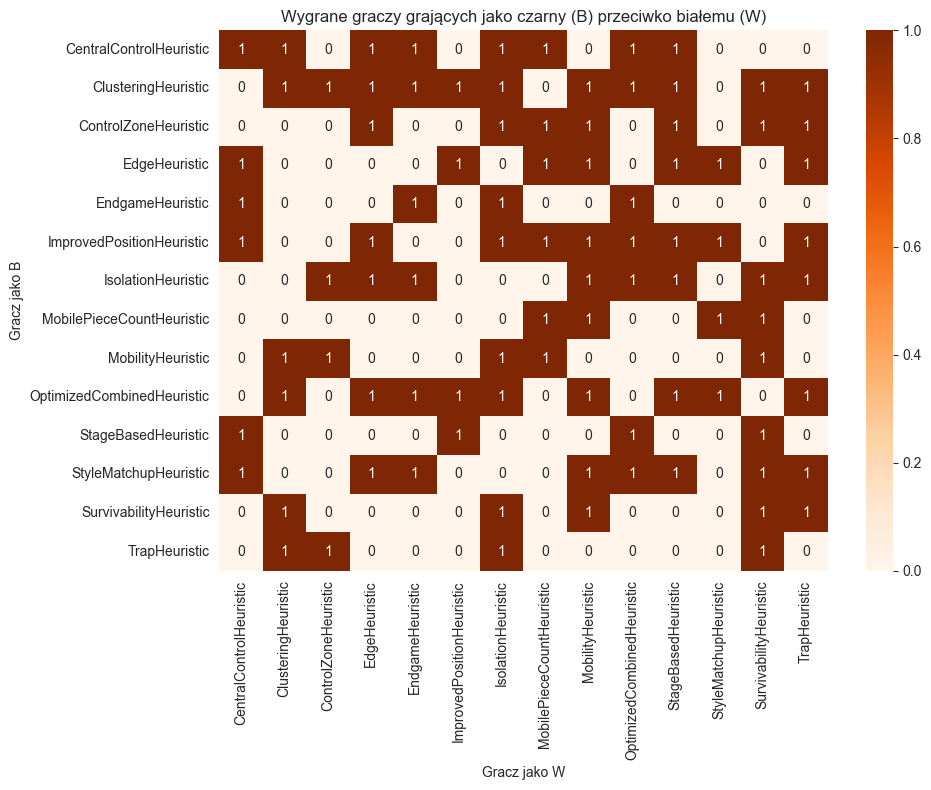

In [63]:
# Lista heurystyk
heuristics = sorted(set(df['B heuristic']).union(set(df['W heuristic'])))

# Macierz: wiersz = gracz jako B, kolumna = gracz jako W
head_to_head = pd.DataFrame(0, index=heuristics, columns=heuristics)

# Uzupełniamy ręcznie: dla każdej gry, kto grał jako B i W oraz kto wygrał
for _, row in df.iterrows():
    b = row['B heuristic']
    w = row['W heuristic']
    if row['winner'] == 'B':
        head_to_head.loc[b, w] += 1
    else:
        # To był zwycięzca W, czyli b przegrał z w — nie zwiększamy odwrotności
        pass

plt.figure(figsize=(10, 8))
sns.heatmap(head_to_head, annot=True, fmt='d', cmap='Oranges')
plt.title('Wygrane graczy grających jako czarny (B) przeciwko białemu (W)')
plt.xlabel('Gracz jako W')
plt.ylabel('Gracz jako B')
plt.tight_layout()
plt.show()


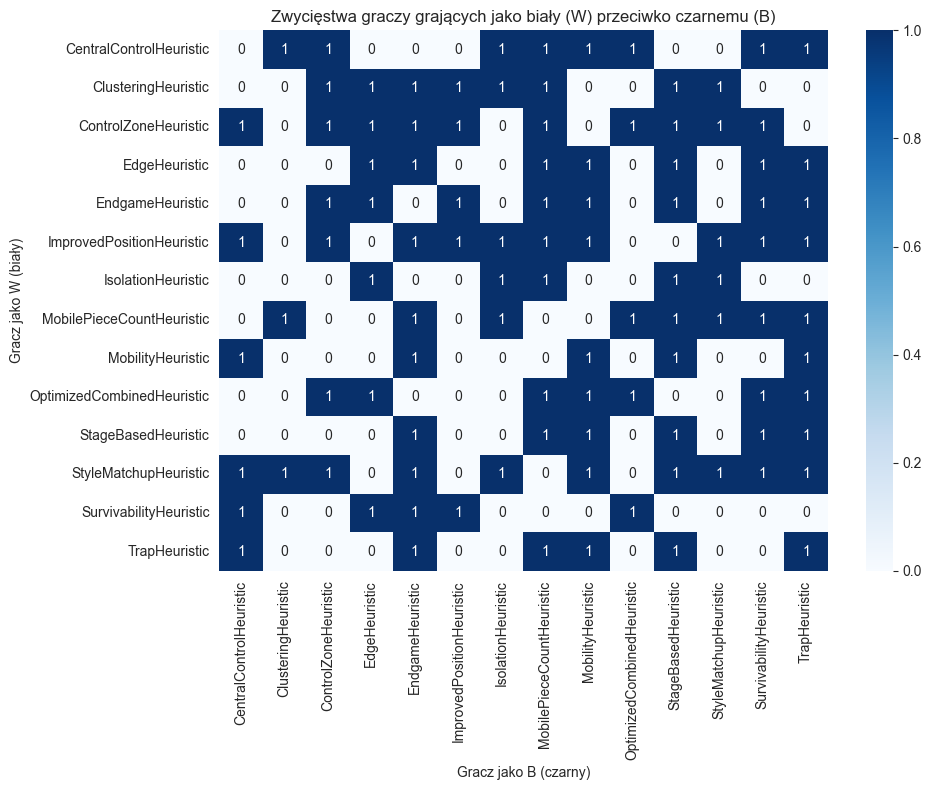

In [64]:
# Lista heurystyk (upewniamy się, że wszystkie są w indeksie i kolumnach)
heuristics = sorted(set(df['B heuristic']).union(set(df['W heuristic'])))

# Tworzymy macierz: wiersz = gracz jako W, kolumna = gracz jako B
white_win_matrix = pd.DataFrame(0, index=heuristics, columns=heuristics)

# Przechodzimy po wszystkich grach
for _, row in df.iterrows():
    if row['winner'] == 'W':
        w_heur = row['W heuristic']
        b_heur = row['B heuristic']
        white_win_matrix.loc[w_heur, b_heur] += 1

# Rysujemy heatmapę
plt.figure(figsize=(10, 8))
sns.heatmap(white_win_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Zwycięstwa graczy grających jako biały (W) przeciwko czarnemu (B)')
plt.xlabel('Gracz jako B (czarny)')
plt.ylabel('Gracz jako W (biały)')
plt.tight_layout()
plt.show()

